# **Spotify Songs’ Genre Segmentation**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/spotifydataset.csv")
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

# Data Processing

Perform Data pre-processing operations

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

# Data Analysis & Visualization

As a part of data analysis and visulaizations draw all the possible plots to provide essential informations and to derive some meaningful insights.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-5-327e2c3e2455>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='playlist_genre', order=df['playlist_genre'].value_counts().index, palette='viridis', )


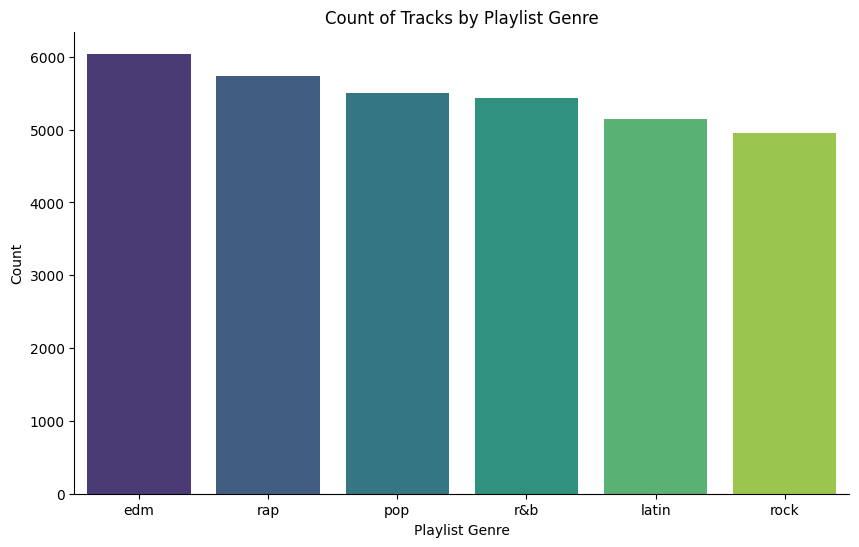

In [ ]:
 plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='playlist_genre', order=df['playlist_genre'].value_counts().index, palette='viridis', )
plt.title('Count of Tracks by Playlist Genre', color='black')
plt.xlabel('Playlist Genre', color='black')
plt.ylabel('Count', color='black')
plt.xticks(color='black')
plt.yticks(color='black')


plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


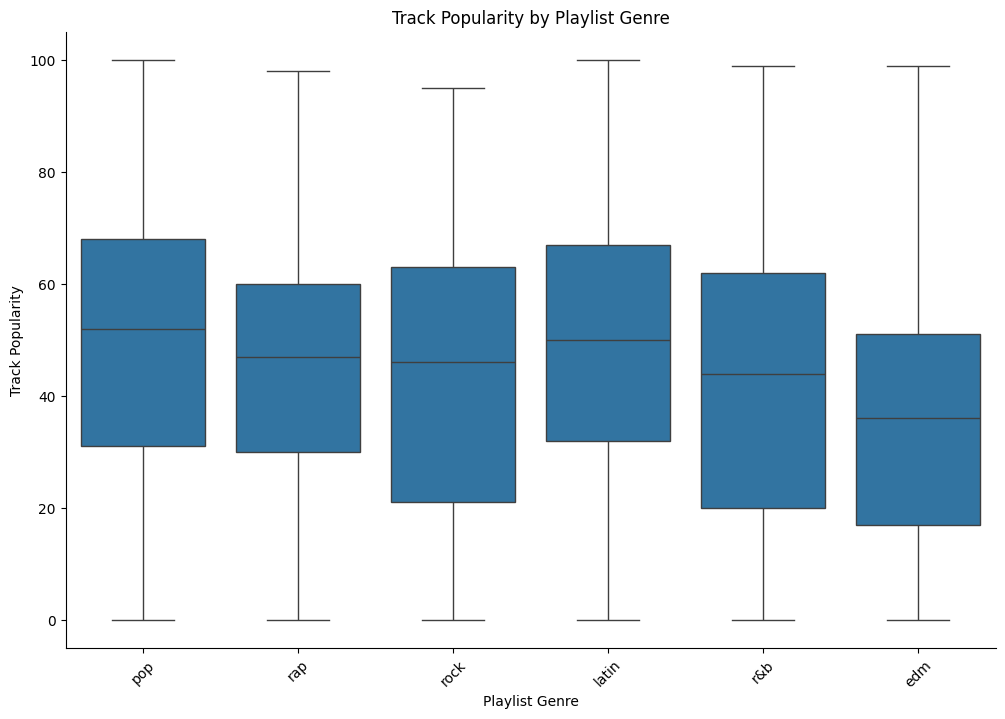

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='playlist_genre', y='track_popularity', data=df)
plt.title('Track Popularity by Playlist Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Track Popularity')
plt.xticks(rotation=45)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


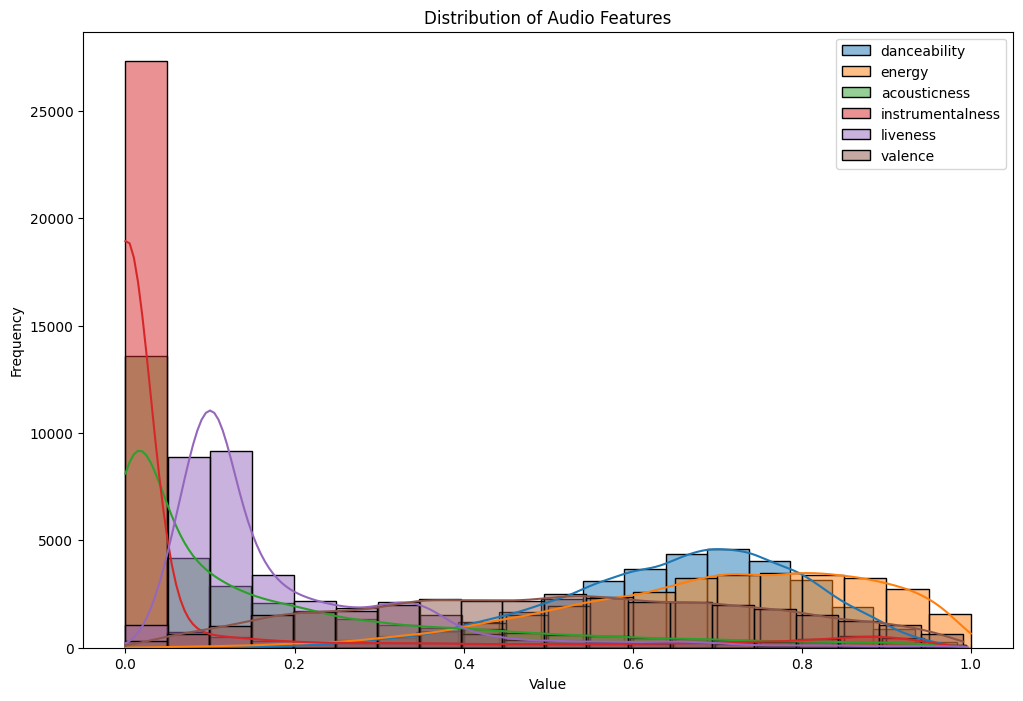

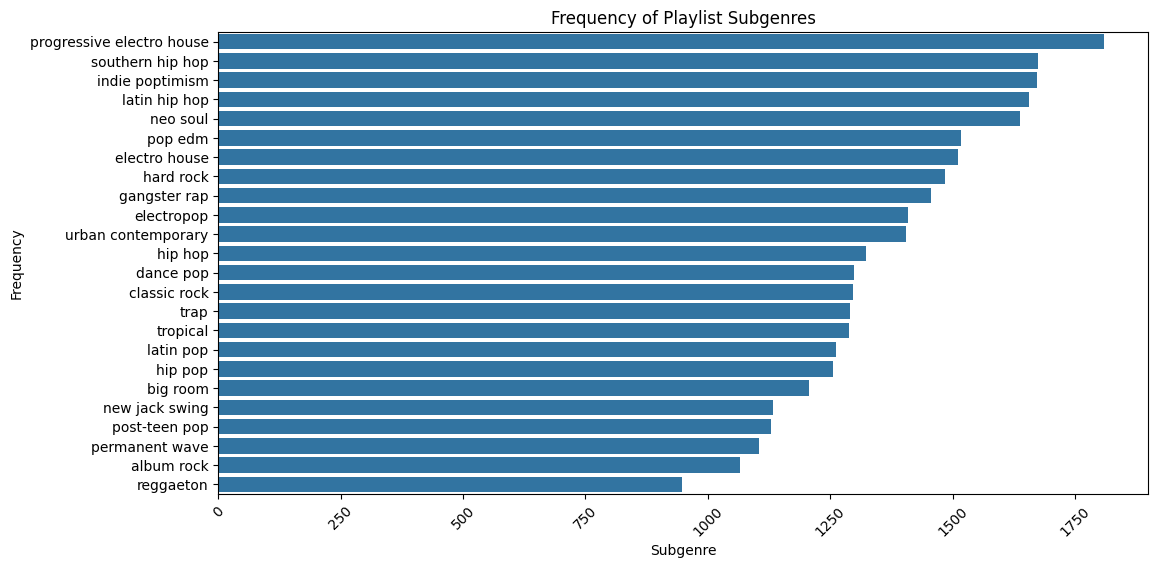

In [ ]:
# Visualization and analysis of danceability, energy, acousticness, instrumentalness, liveness, valence
audio_features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence']
plt.figure(figsize=(12, 8))
for feature in audio_features:
    sns.histplot(df[feature], bins=20, kde=True, label=feature, alpha=0.5)
plt.title('Distribution of Audio Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(df['playlist_subgenre'], order=df['playlist_subgenre'].value_counts().index)
plt.title('Frequency of Playlist Subgenres')
plt.xlabel('Subgenre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

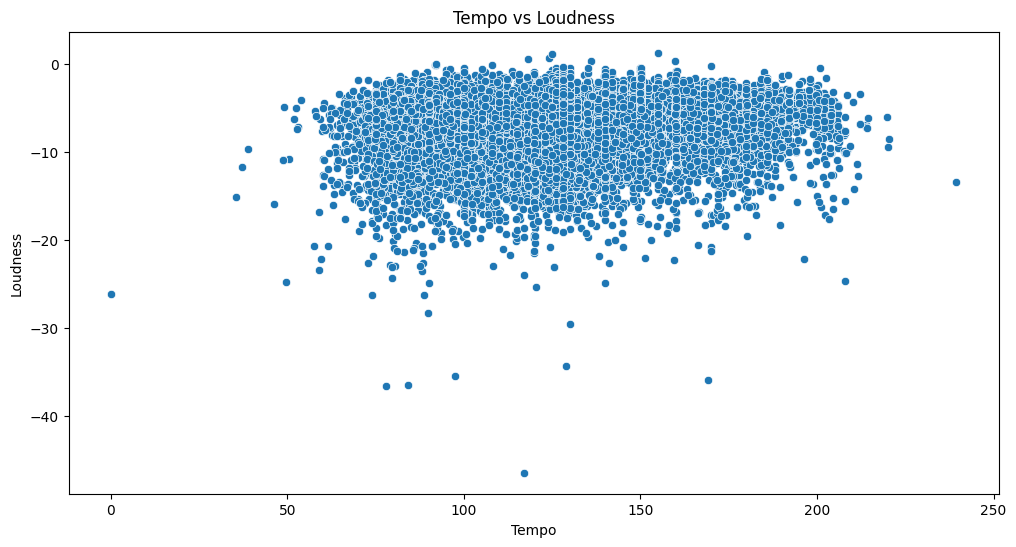

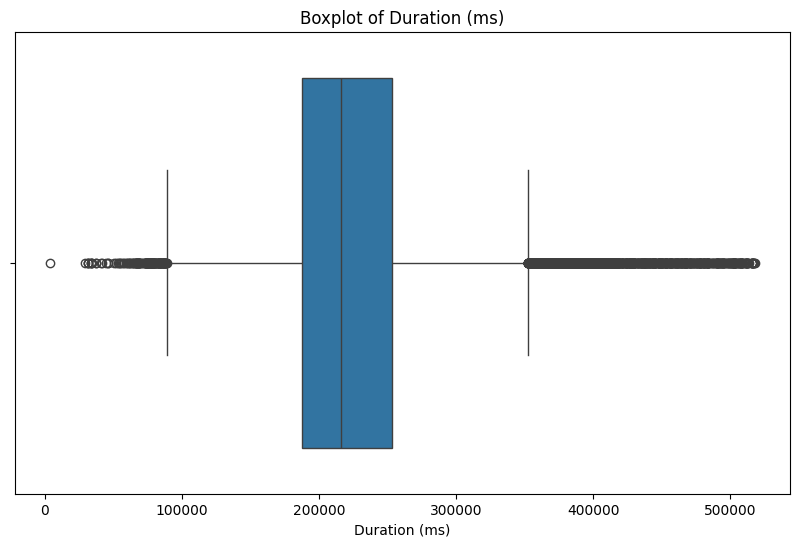

In [ ]:
# Visualization and analysis of tempo, loudness, duration_ms
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tempo', y='loudness', data=df)
plt.title('Tempo vs Loudness')
plt.xlabel('Tempo')
plt.ylabel('Loudness')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='duration_ms', data=df)
plt.title('Boxplot of Duration (ms)')
plt.xlabel('Duration (ms)')
plt.show()

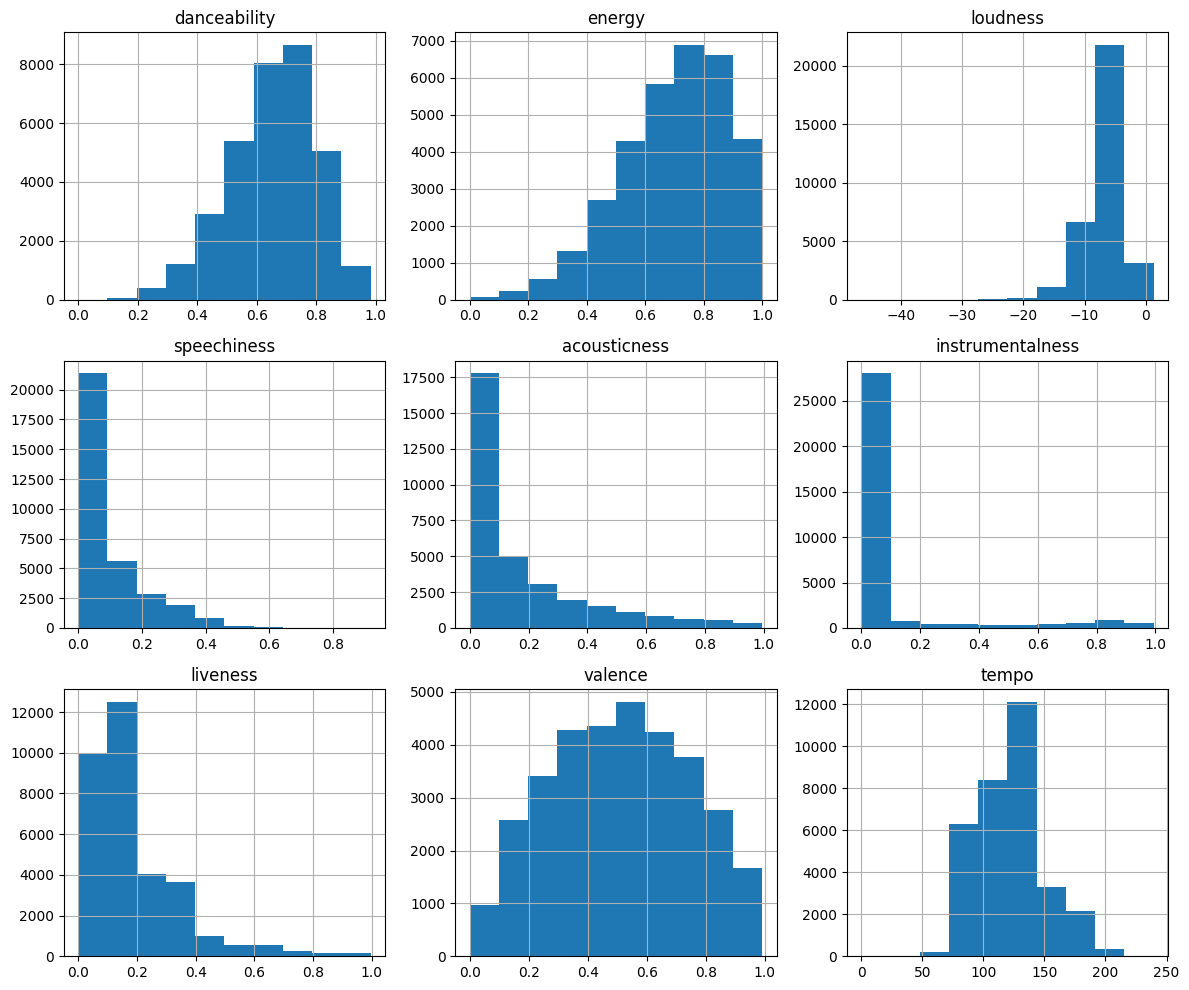

In [ ]:
df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


## Correlation Matrix

Show your coorelation matrix of features according to the datasets.

In [ ]:
numerical_columns = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [ ]:
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)


                  track_popularity  danceability    energy       key  \
track_popularity          1.000000      0.064754 -0.108984 -0.000405   
danceability              0.064754      1.000000 -0.086074  0.011771   
energy                   -0.108984     -0.086074  1.000000  0.009972   
key                      -0.000405      0.011771  0.009972  1.000000   
loudness                  0.057717      0.025351  0.676662  0.000920   
mode                      0.010553     -0.058711 -0.004778 -0.173981   
speechiness               0.007067      0.181808 -0.032184  0.022462   
acousticness              0.085042     -0.024515 -0.539732  0.004378   
instrumentalness         -0.150003     -0.008658  0.033282  0.006022   
liveness                 -0.054593     -0.123899  0.161317  0.002834   
valence                   0.033278      0.330538  0.151050  0.019933   
tempo                    -0.005538     -0.184132  0.150072 -0.013316   
duration_ms              -0.143634     -0.096922  0.012560  0.01

# Clustering

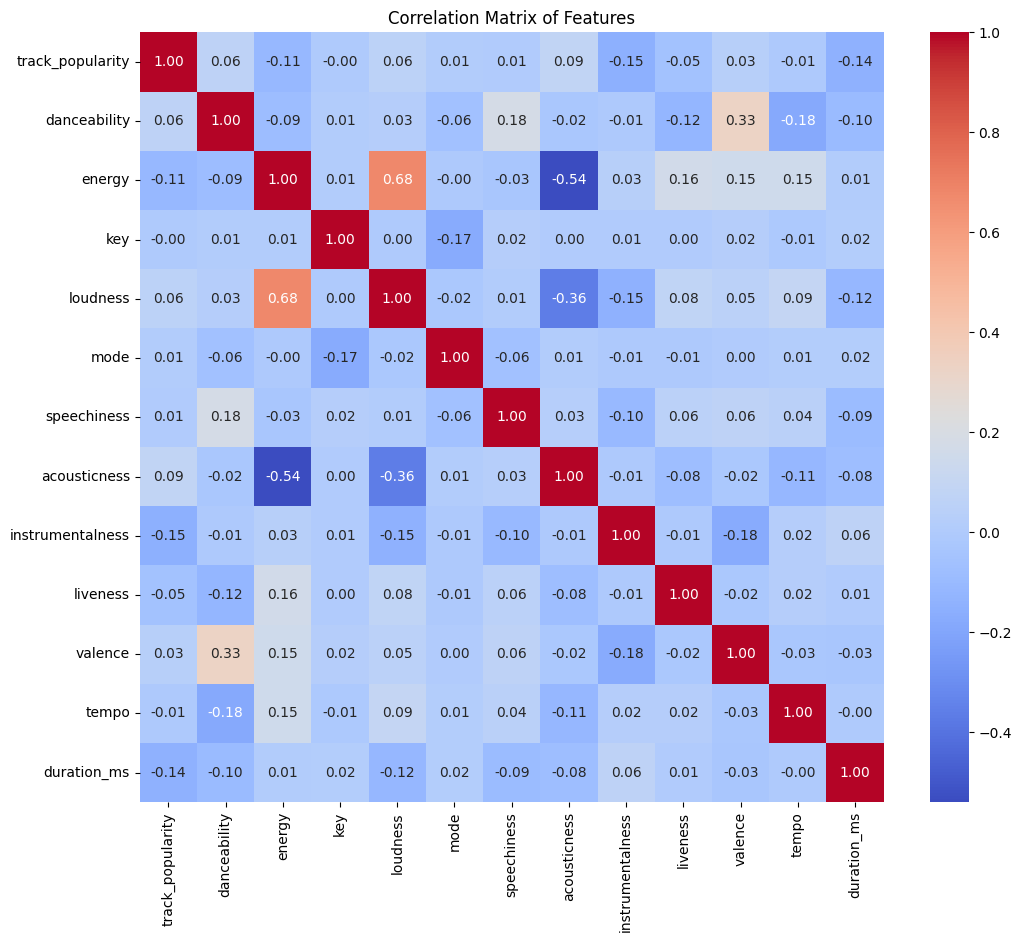

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Model Building

Build your model and show your final result so that the recommendation system can be build based on that.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
target = 'playlist_genre'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)
y_pred_gb

Gradient Boosting Classifier Accuracy: 0.5491928114529394


array(['edm', 'rock', 'rock', ..., 'r&b', 'r&b', 'edm'], dtype=object)

In [22]:
# KNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Classifier Accuracy:", accuracy_knn)
y_pred_knn

K-Nearest Neighbors Classifier Accuracy: 0.2622601279317697


array(['edm', 'pop', 'pop', ..., 'r&b', 'rock', 'latin'], dtype=object)

In [21]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)
y_pred_dt

Decision Tree Classifier Accuracy: 0.44547669814194335


array(['edm', 'rock', 'rap', ..., 'r&b', 'rock', 'edm'], dtype=object)